In [20]:
#assignment 2：1. Significant earthquakes since 2150 B.C.
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'earthquakes-2025-10-29_21-12-30_+0800.tsv'

 # 将下载的数据读入一个名为 Sig_Eqs 的 pandas DataFrame 对象
    # sep='\t' 表示数据是使用制表符分隔的
Sig_Eqs = pd.read_csv(file_path, sep='\t')
# 1. 清洗 'DEATHS' 
#    'errors='coerce'' 会将无法转换为数字的值(例如空字符串)设为 NaT (Not a Number)
#    .fillna(0) 会将所有的 NaT/NaN 值替换为 0，以便进行数学计算
Sig_Eqs['Deaths'] = pd.to_numeric(Sig_Eqs['Deaths'], errors='coerce').fillna(0)

# 2. 清洗 'Mag' (震级) 列
#    同样，将非数字值转为 NaN，但这里我们不填充为0，因为0级地震和无记录是两回事
Sig_Eqs['Mag'] = pd.to_numeric(Sig_Eqs['Mag'], errors='coerce')

# 3. 清洗 'COUNTRY' (国家) 列
#    .str.strip() 移除国家名称前后可能存在的的多余空格
#    .dropna() 移除那些没有国家信息(NaN)的记录，这对于1.1和1.3题至关重要
Sig_Eqs['Country'] = Sig_Eqs['Country'].str.strip()
Sig_Eqs.dropna(subset=['Country'], inplace=True)



In [21]:
# 1.1计算每个国家自公元前 2150 年以来因地震造成的死亡总数，然后打印前十个国家以及死亡总数。

# 使用 groupby('COUNTRY') 按国家分组
# 选择 'DEATHS' 列并计算总和 (.sum())
deaths_by_country = Sig_Eqs.groupby('Country')['Deaths'].sum()

# .sort_values(ascending=False) 按降序排序
# .head(10) 选出前10条记录
top_10_deaths = deaths_by_country.sort_values(ascending=False).head(10)

# 结果
print("自公元前2150年以来各国地震总死亡人数(前十名):")
print(top_10_deaths)


自公元前2150年以来各国地震总死亡人数(前十名):
Country
CHINA         2139210.0
TURKEY        1199742.0
IRAN          1014453.0
ITALY          498219.0
SYRIA          419226.0
HAITI          323484.0
AZERBAIJAN     319251.0
JAPAN          242445.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64


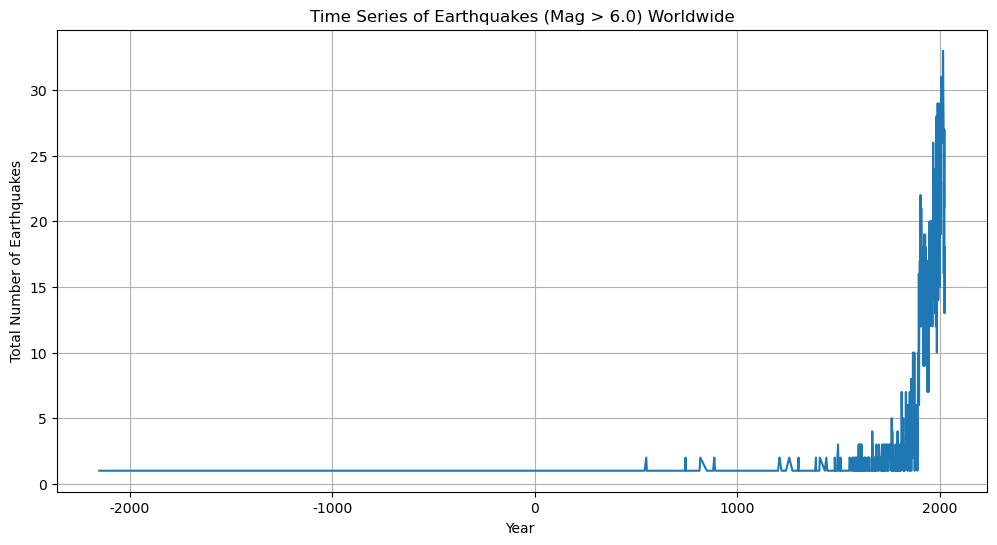


趋势观察 (Trend Observation):

在最近的几十年（例如1900年以后），记录到的地震数量急剧增加。

这意味着6.0级以上的地震真的越来越频繁了？

答案很可能是否定的。

解释 (Explanation):
这种“趋势”很可能是一种“观测偏差” (Observation Bias) 或“报告偏差” (Reporting Bias)。
1. 监测能力：在20世纪之前，全球没有统一的地震监测网络。地震的记录依赖于
   人工报告，这导致只有那些发生在人口密集区且造成重大破坏的地震才会被记录下来。
   发生在海洋或偏远地区的6.0级地震很可能根本未被记录。
2. 技术进步：随着全球地震台网（如GNS）在20世纪（特别是中后期）的建立和完善，
   我们检测、定位和测量全球范围内地震的能力大大增强。
   现在，即使是发生在南极洲的6.0级地震也能被精确记录。

结论：图表上显示的地震数量增加，更可能反映的是我们“记录地震的能力”的提高，
而不是“地震发生的实际频率”的增加。



In [22]:
#1.2计算震级大于 6.0 的地震总数（使用 Mag 作为星等），然后绘制时间序列。你观察到任何趋势吗？解释为什么或为什么不？

# 1. 筛选
# 首先，筛选出 'Mag' (震级) 大于 6.0 的所有地震记录
eqs_gt_6 = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]

# 2. 按年统计
# 按 'Year' (年份) 分组，并使用 .size() 或 .count() 计算每年的地震次数
# .size() 效率更高
eqs_per_year = eqs_gt_6.groupby('Year').size()

# 3. 绘制时间序列图
plt.figure(figsize=(12, 6)) # 设置图表大小
eqs_per_year.plot(kind='line') # 绘制线图

# 添加标题和标签
# Matplotlib 默认可能不支持中文，如果显示为方框，需要额外配置字体（想加中文字体需要额外加入包）；或者直接改为英文就不会警告

plt.title('Time Series of Earthquakes (Mag > 6.0) Worldwide')#\n全球每年6.0级以上地震时间序列
plt.xlabel('Year ')#(年份)
plt.ylabel('Total Number of Earthquakes')# (地震总数)
plt.grid(True) # 显示网格

#结果
plt.show()



# 4. 趋势观察与解释
print("\n趋势观察 (Trend Observation):")
print("""
在最近的几十年（例如1900年以后），记录到的地震数量急剧增加。

这意味着6.0级以上的地震真的越来越频繁了？

答案很可能是否定的。

解释 (Explanation):
这种“趋势”很可能是一种“观测偏差” (Observation Bias) 或“报告偏差” (Reporting Bias)。
1. 监测能力：在20世纪之前，全球没有统一的地震监测网络。地震的记录依赖于
   人工报告，这导致只有那些发生在人口密集区且造成重大破坏的地震才会被记录下来。
   发生在海洋或偏远地区的6.0级地震很可能根本未被记录。
2. 技术进步：随着全球地震台网（如GNS）在20世纪（特别是中后期）的建立和完善，
   我们检测、定位和测量全球范围内地震的能力大大增强。
   现在，即使是发生在南极洲的6.0级地震也能被精确记录。

结论：图表上显示的地震数量增加，更可能反映的是我们“记录地震的能力”的提高，
而不是“地震发生的实际频率”的增加。
""")



In [24]:
# 1.3编写函数 CountEq_LargestEq 返回 
#（1） 的总数 自公元前 2150 年以来在特定国家发生的地震和 
#（2） 地震日期 这个国家发生了有史以来最大的地震。应用 CountEq_LargestEq 文件中的每个国家/地区，按降序报告您的结果。

def CountEq_LargestEq(country_name, data):
    """
    计算给定国家(country_name)在数据集(data)中的
    (1) 地震总数 和 (2) 最大震级地震的日期。
    
    参数:
    country_name (str): 要查询的国家名称
    data (pd.DataFrame): 完整的地震数据集 (Sig_Eqs)
    
    返回:
    tuple: (total_count, largest_eq_date)
           (地震总数, 最大地震日期字符串)
    """
    
    # 1. 筛选特定国家的数据
    country_data = data[data['Country'] == country_name]
    
    # 2. (1) 计算总数
    total_count = len(country_data)
    
    # 3. 处理空数据：如果该国家没有记录，直接返回
    if total_count == 0:
        return 0, "N/A (无记录)"

    # 4. (2) 查找最大震级地震
    
    # 首先，确保该国家的记录中有有效的震级数据
    valid_mag_data = country_data.dropna(subset=['Mag'])
    
    if valid_mag_data.empty:
        # 如果有地震记录，但都没有震级数据
        return total_count, "N/A (无震级数据)"
    
    # .idxmax() 找到 'Mag' 列中最大值的索引
    largest_eq_index = valid_mag_data['Mag'].idxmax()
    
    # .loc[] 使用该索引从原始数据中定位到那一行
    largest_eq_row = data.loc[largest_eq_index]
    
    # 5. 格式化日期
    # 处理日期(Mo, Dy)可能缺失(NaN)的情况
    year = largest_eq_row['Year']
    month = int(largest_eq_row['Mo']) if pd.notna(largest_eq_row['Mo']) else '??'
    day = int(largest_eq_row['Dy']) if pd.notna(largest_eq_row['Dy']) else '??'
    
    # 将日期格式化为 "YYYY-MM-DD"
    largest_eq_date = f"{year}-{month}-{day}"
    
    return total_count, largest_eq_date

#应用函数到所有国家

# 1. 获取数据中所有不重复的国家列表
# .dropna() 确保我们不处理NaN
# .unique() 获取唯一的国家名称数组
countries_list = Sig_Eqs['Country'].dropna().unique()

# 2. 循环遍历所有国家，应用函数并存储结果
results = []
for country in countries_list:
    count, date = CountEq_LargestEq(country, Sig_Eqs)
    results.append({
        'Country': country,
        'TotalEarthquakes': count,
        'LargestEarthquakeDate': date
    })

# 3. 将结果列表转换为 DataFrame，便于排序和显示
results_df = pd.DataFrame(results)

# 4. 按 "TotalEarthquakes" (地震总数) 降序排序
results_sorted = results_df.sort_values(by='TotalEarthquakes', ascending=False)

# 5. 报告结果
print("所有国家地震总数及最大地震日期 (按总数降序排列):")
# 设置 pandas 显示更多行，以便查看完整列表（如果需要）
pd.set_option('display.max_rows', None) 
print(results_sorted)
pd.reset_option('display.max_rows') # 恢复默认设置


所有国家地震总数及最大地震日期 (按总数降序排列):
                                          Country  TotalEarthquakes  \
14                                          CHINA               623   
33                                          JAPAN               424   
72                                      INDONESIA               421   
7                                            IRAN               388   
9                                          TURKEY               358   
5                                           ITALY               333   
3                                          GREECE               289   
55                                            USA               280   
70                                    PHILIPPINES               230   
51                                         MEXICO               214   
59                                          CHILE               200   
50                                           PERU               194   
15                                         RUSSIA 

In [25]:
#assignment 2.2
# 导入需要用到的库
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np  
from scipy.stats import linregress  


In [26]:
# 1. 加载数据
# 定义数据文件名
file_name = '2281305.csv'

data = pd.read_csv('2281305.csv', dtype=str)
    # 我们可以只保留后续分析需要的列
data = data[['DATE', 'WND']].copy()


In [27]:
# 2. 数据预处理和过滤

# 2.1 处理时间数据

data['DATE'] = pd.to_datetime(data['DATE'])

# 2.2 解析和过滤风速数据 (WND)
# 根据 NOAA ISD 用户指南 (isd-format-document.pdf, 第8-9页, POS 61-70):
# 'WND' 列是一个逗号分隔的字符串，格式为:
# "风向,风向质量代码,风类型代码,风速,风速质量代码"
# 示例: "040,1,N,0031,1"
#
# 我们需要执行以下过滤步骤：
# 1. 提取第 4 个元素 (索引 3): 风速值 (例如 '0031')
# 2. 提取第 5 个元素 (索引 4): 风速质量代码 (例如 '1')
# 3. 过滤质量代码：只保留质量好的数据。根据指南，'0', '1', '4', '5', '9' 是有效或可用的。
# 4. 过滤缺失值：风速的缺失值用 '9999' 表示，必须剔除。
# 5. 数据转换：风速值是 10 的倍数。'0031' 实际上代表 3.1 米/秒 (m/s)。

# 定义一个函数来处理 WND 字符串
def parse_wind_speed(wnd_string):
    try:
        # 按逗号分割字符串
        parts = wnd_string.split(',')
        
        # 提取风速 (POS 66-69)，即第4个元素 (索引 3)
        speed_str = parts[3]
        
        # 提取风速质量代码 (POS 70)，即第5个元素 (索引 4)
        quality_code = parts[4]
        
        #数据过滤步骤 (Explanation for Report):
        
        # 过滤步骤 1: 检查质量代码
        # 我们只接受 '0', '1', '4', '5', '9' (高质量或修正过的数据)
        valid_quality_codes = ['0', '1', '4', '5', '9']
        if quality_code not in valid_quality_codes:
            return np.nan # 质量差，返回 NaN (Not a Number)

        # 过滤步骤 2: 检查缺失值
        # 缺失的风速用 '9999' 表示
        if speed_str == '9999':
            return np.nan # 缺失数据，返回 NaN

        # 过滤步骤 3: 数据转换
        # 风速被放大了10倍，需要除以 10.0 来还原
        speed_m_s = float(speed_str) / 10.0
        
        return speed_m_s
        
    except Exception:
        # 如果字符串格式不正确 (例如数据损坏)，也返回 NaN
        return np.nan

# 将 `parse_wind_speed` 函数应用到 'WND' 列
# .apply() 会遍历 'WND' 列的每一行，并用我们的函数处理它
data['Wind_Speed'] = data['WND'].apply(parse_wind_speed)

# 过滤后，查看有多少数据被保留
valid_data_count = data['Wind_Speed'].count()
print(f"数据过滤完成。保留了 {valid_data_count} 条有效的风速记录。")


数据过滤完成。保留了 111346 条有效的风速记录。


In [30]:
#3. 计算月平均风速

# 3.1 将 'DATE' 列设置为 DataFrame 的索引 (index)
# 这是进行时间序列重采样 (resample) 的标准做法
data_indexed = data.set_index('DATE')

# 3.2 按月重采样
# .resample('M') 表示按月 ('M' = Month End) 聚合数据。
#在 pandas 库中，'M' 是 "Month End" (月末) 频率的旧别名。开发团队现在决定用 'ME' 作为 "Month End" 的标准别名，以提高清晰度并统一命名规范。
# .mean() 计算每个月内所有有效风速的平均值。
# .dropna() 移除那些在整月中都没有有效数据的月份 (结果为 NaN)
monthly_avg_wind = data_indexed['Wind_Speed'].resample('ME').mean().dropna()

#检查
#print("\n计算得到的月平均风速 (前5个月):")
#print(monthly_avg_wind.head())


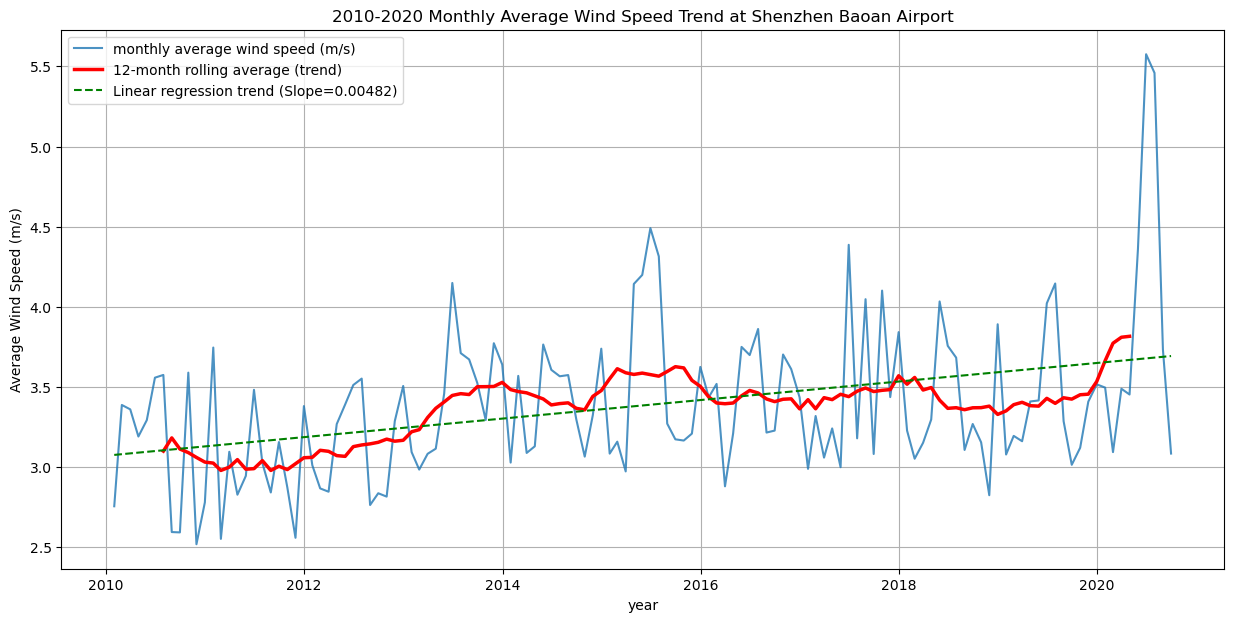


趋势分析报告：
线性回归分析结果:
  斜率 (Slope): 0.004818 m/s 每月
  P值 (P-value): 0.000018
结论: 是的，存在一个统计上显著的 上升 趋势。


In [32]:
#4. 绘图：月平均风速随时间变化

# 设置图表大小
plt.figure(figsize=(15, 7))

# 不建议使用中文，需要额外操作
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

# 绘制原始的月平均数据
#monthly_avg_wind.plot(label='monthly_avg_wind (m/s)', alpha=0.8)
plt.plot(monthly_avg_wind.index, monthly_avg_wind.values, label='monthly average wind speed (m/s)', alpha=0.8)

# 5. 趋势分析 (回答问题)
# 为了更清晰地看到长期趋势，我们计算一个 12 个月的滚动平均值（年平均）
# .rolling(window=12) 会平滑掉季节性波动，帮助我们看清大趋势
rolling_trend = monthly_avg_wind.rolling(window=12, center=True).mean()
#rolling_trend.plot(color='red', linewidth=2.5, label='12-month rolling average (trend)')
plt.plot(rolling_trend.index, rolling_trend.values, color='red', linewidth=2.5, label='12-month rolling average (trend)')

# 使用线性回归进行严格的趋势分析
# 1. 准备数据：创建 x 轴 (数值时间) 和 y 轴 (风速)
#    我们必须去掉开头的 NaN (由滚动平均产生)
valid_data = monthly_avg_wind.dropna()
# x 轴是从 0 到 N-1 (N是总月数)
x_axis = np.arange(len(valid_data))
y_axis = valid_data.values

# 2. 计算线性回归
#    linregress 返回: slope(斜率), intercept(截距), r-value(相关系数), p-value, std-err
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)

# 3. 绘制回归线 ( y = slope * x + intercept )
regression_line = slope * x_axis + intercept

plt.plot(valid_data.index, regression_line, 'g--', label=f'Linear regression trend (Slope={slope:.5f})')

#6. 完善图表
plt.title('2010-2020 Monthly Average Wind Speed Trend at Shenzhen Baoan Airport')
plt.xlabel('year')
plt.ylabel('Average Wind Speed (m/s)')
plt.grid(True) # 显示网格
plt.legend() # 显示图例 (label)

# 显示图表
plt.show()

# --- 7. 回答问题：是否有趋势？ ---
print("\n趋势分析报告：")
print(f"线性回归分析结果:")
print(f"  斜率 (Slope): {slope:.6f} m/s 每月")
print(f"  P值 (P-value): {p_value:.6f}")

# 分析趋势
# P值告诉我们这个斜率是否在统计上显著（p < 0.05 通常被认为是显著的）
if p_value < 0.05:
    if slope > 0:
        print("结论: 是的，存在一个统计上显著的 上升 趋势。")
    elif slope < 0:
        print("结论: 是的，存在一个统计上显著的 下降 趋势。")
    else:
        print("结论: 趋势在统计上显著，但斜率接近于零。")
else:
    print("结论: 否，P值大于 0.05，表明在2010-2020年间 没有 观察到统计上显著的长期趋势。")

In [10]:
#(前面的 ! 符号告诉 Notebook 在 shell/终端中运行这个命令)
#!pip install xlrd==1.2.0

'xlrd' 库已找到。

--- 3.1 开始：自动加载和清洗多个数据文件 ---
--- 正在搜索路径: C:\Users\Administrator\ese5023\1992-2023年China Provincial Nighttime Light Data\县表\DMSP*.xls ---

--- 调试信息 ---
搜索路径: C:\Users\Administrator\ese5023\1992-2023年China Provincial Nighttime Light Data\县表\DMSP*.xls
glob 找到了 32 个文件。
找到的文件列表 (示例前5个):
  - C:\Users\Administrator\ese5023\1992-2023年China Provincial Nighttime Light Data\县表\DMSP-like2013.xls
  - C:\Users\Administrator\ese5023\1992-2023年China Provincial Nighttime Light Data\县表\DMSP-like2014.xls
  - C:\Users\Administrator\ese5023\1992-2023年China Provincial Nighttime Light Data\县表\DMSP-like2015.xls
  - C:\Users\Administrator\ese5023\1992-2023年China Provincial Nighttime Light Data\县表\DMSP-like2016.xls
  - C:\Users\Administrator\ese5023\1992-2023年China Provincial Nighttime Light Data\县表\DMSP-like2017.xls
--- 调试信息结束 ---

--- 成功找到 32 个匹配的文件, 准备处理... ---
  正在加载: C:\Users\Administrator\ese5023\1992-2023年China Provincial Nighttime Light Data\县表\DMSP-like2013.xls (自动识别年份: 2013)...
    -> 成功

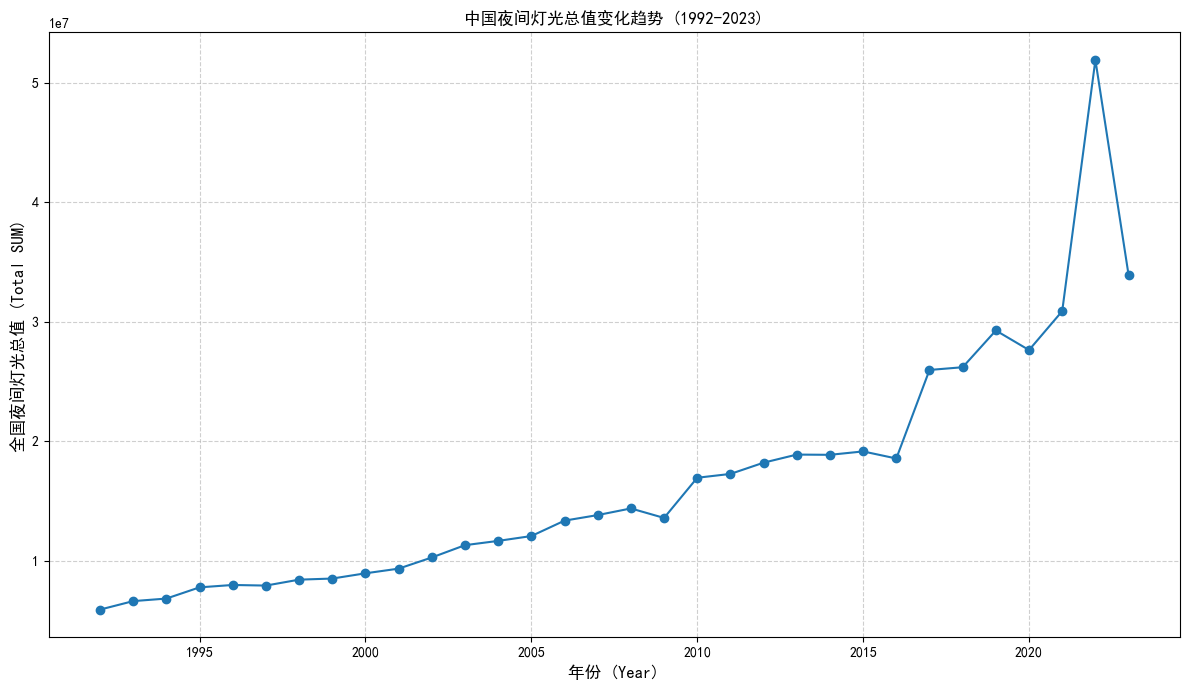

--- 3.2 结束：绘图完成 ---

--- 3.3 开始：进行 5 项简单的 statistical checks ---

--- 检查 1 (综合描述性统计) ---
count    3.200000e+01
mean     1.662514e+07
std      1.010731e+07
min      5.893553e+06
25%      8.822994e+06
50%      1.368927e+07
75%      1.894122e+07
max      5.192518e+07
Name: Total_Light_SUM, dtype: float64

--- 详细报告 5 项独立 statistical checks ---
发现 1 (均值): 观测年份的平均灯光总值为 16,625,137.12。
发现 2 (中位数): 观测年份的灯光总值中位数为 13,689,268.50。
发现 3 (最小值): 最低灯光总值为 5,893,553.00，出现在 1992 年。
发现 4 (最大值): 最高灯光总值为 51,925,180.00，出现在 2022 年。
发现 5 (总增长率): 从 1992 年到 2023 年，全国灯光总值增长了 475.52%。

--- 总结报告 (Findings) ---
1. 数据显示了显著的增长趋势，从 1992 年的 5,893,553.00 增长到 2022 年的 51,925,180.00。
2. 均值 (16,625,137.12) 略高于 中位数 (13,689,268.50)，表明数据分布可能存在轻微的右偏（即有少数年份的增长特别高）。
3. 总体增长率高达 475.52%，这与中国近几十年的快速城市化和经济发展相吻合。


In [9]:
#assignment 2：3. Explore a data set
# 导入所需的库
import pandas as pd  # 用于数据处理和分析
import matplotlib.pyplot as plt # 用于数据可视化
import re # 用于从文件名中提取年份 (正则表达式)
import glob # 用于自动查找文件
import os # 用于处理文件路径
import subprocess # !! 新增：用于运行 'pip'
import sys # !! 新增：用于获取 python 可执行文件路径

# --- 中文显示设置 ---
# 解决 Matplotlib 中文显示问题 (如果你的图表标题或标签需要中文)
try:
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
    plt.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号'-'显示为方块的问题
except Exception as e:
    print(f"中文字体设置失败, 可能会有显示问题: {e}")
    print("请确保你安装了 'SimHei' 字体, 或者换成你系统中的其他中文字体")
# --- 中文显示设置结束 ---


# --- !! 最终修复：自动检查并安装 xlrd==1.2.0 ---
# 我们必须使用这个旧版本来读取 .xls 文件你电脑上安装的 pandas 库是一个新版本。
#这个新版本 pandas 拒绝和旧的 xlrd==1.2.0 一起工作，它强制要求你安装 xlrd 2.0.1 或更新版。
try:
    import xlrd
    print("'xlrd' 库已找到。")
    if xlrd.__version__ != '1.2.0':
        print(f"警告：检测到 'xlrd' 版本为 {xlrd.__version__}，而不是 1.2.0。")
        print("如果读取失败，请先运行: pip uninstall xlrd")
        print("然后再运行: pip install xlrd==1.2.0")
        
except ImportError:
    print("--- 未找到 'xlrd' 库, 正在尝试自动安装 'xlrd==1.2.0'... ---")
    
    try:
        # 尝试使用 pip 自动安装
        subprocess.check_call([sys.executable, "-m", "pip", "install", "xlrd==1.2.0"])
        
        # 再次尝试导入
        import xlrd
        print("--- 'xlrd==1.2.0' 安装成功! ---")
    
    except Exception as e:
        print(f"!!! 自动安装失败: {e}")
        print("!!! 请手动在你的终端(Anaconda Prompt)运行: pip install xlrd==1.2.0")
        print("!!! 然后 **必须重启你的 Jupyter/VSCode 内核 (Kernel)** 再试一次。")
        exit() # 停止脚本
# --- 自动安装结束 ---


# ==========================================================
#                  作业解答开始
# ==========================================================

print("\n--- 3.1 开始：自动加载和清洗多个数据文件 ---")

# 1. (自动) 定义文件搜索模式
folder_path = r'C:\Users\Administrator\ese5023\1992-2023年China Provincial Nighttime Light Data\县表'
pattern = 'DMSP*.xls' 
file_pattern = os.path.join(folder_path, pattern)

print(f"--- 正在搜索路径: {file_pattern} ---")

# 2. (自动) 使用 glob 查找所有匹配的文件
file_list = glob.glob(file_pattern)

# --- 调试步骤：检查 glob 找到了什么 ---
print(f"\n--- 调试信息 ---")
print(f"搜索路径: {file_pattern}")
print(f"glob 找到了 {len(file_list)} 个文件。")
if len(file_list) > 0:
    print("找到的文件列表 (示例前5个):")
    for f in file_list[:5]:
        print(f"  - {f}")
print("--- 调试信息结束 ---\n")
# --- 调试信息结束 ---

if not file_list:
    print(f"错误：在路径 '{folder_path}' 中未找到任何匹配 '{pattern}' 的文件。")
    print("请确保路径正确，且该文件夹内确实有 DMSP 开头的 .xls 文件。")
    exit() 

print(f"--- 成功找到 {len(file_list)} 个匹配的文件, 准备处理... ---")

# 3. 创建一个空列表, 用于存储每年的聚合数据
time_series_data = []

# 4. 循环遍历自动找到的文件列表
for file_name in file_list:
    
    # 5. (自动) 从文件名中提取年份
    basename = os.path.basename(file_name) 
    match = re.search(r'(199\d|20\d{2})', basename) 
    
    if not match:
        print(f"  -> 警告: 无法从文件名 '{basename}' 中提取年份，已跳过。")
        continue 
    
    year = int(match.group(0))
    
    print(f"  正在加载: {file_name} (自动识别年份: {year})...")
    
    try:
        # !! 最终修复：我们不再使用 pd.read_excel()
        # !! 我们将使用 xlrd 库直接打开文件, 绕过 pandas 的版本检查
        
        # 1. 使用 xlrd 打开 .xls 文件
        #    (这需要 xlrd==1.2.0)
        workbook = xlrd.open_workbook(file_name)
        
        # 2. 加载第一个工作表 (sheet)
        sheet = workbook.sheet_by_index(0)
        
        # 3. 将工作表数据读入一个 "list of lists"
        data_list = []
        for row_idx in range(sheet.nrows):
            data_list.append(sheet.row_values(row_idx))

        # 4. 手动将数据列表转换为 Pandas DataFrame
        #    假设第一行 (data_list[0]) 是表头 (columns)
        #    剩余的 (data_list[1:]) 是数据
        if len(data_list) > 1:
            # 成功读取, 创建 DataFrame
            df_yearly = pd.DataFrame(data_list[1:], columns=data_list[0])
        else:
            # 文件是空的
            print(f"    -> 警告: 文件 {file_name} 是空的, 已跳过。")
            continue
            
        # --- 数据清洗与提取 (从这里开始和之前一样) ---
        if 'SUM' in df_yearly.columns:
            sum_values = pd.to_numeric(df_yearly['SUM'], errors='coerce')
            total_light_for_year = sum_values.sum()
            
            time_series_data.append({
                'Year': year,
                'Total_Light_SUM': total_light_for_year
            })
            print(f"    -> 成功: {year} 年总灯光值 = {total_light_for_year:.2f}")
        
        else:
            print(f"    -> 警告: 文件 {file_name} 中未找到 'SUM' 列，已跳过。")
            print(f"       该文件的列为: {list(df_yearly.columns)}")
            
    except FileNotFoundError:
        print(f"    -> 错误: 文件 {file_name} 未找到!")
    except xlrd.biffh.XLRDError as e:
        print(f"    -> xlrd 错误: 文件 {file_name} 已损坏或不是 .xls 文件: {e}")
    except Exception as e:
        # 捕获其他所有意外错误
        print(f"    -> 错误: 处理文件 {file_name} 时发生意外错误: {e}")

# 6. (关键步骤) 将聚合后的数据列表转换为一个新的、干净的 DataFrame
print("\n--- 数据聚合完成 ---")
if not time_series_data:
    print("错误：没有成功加载任何数据，脚本无法继续。")
    pass 
else:
    print(f"成功聚合了 {len(time_series_data)} 年的数据。")


# 转换为 DataFrame
ts_df = pd.DataFrame(time_series_data)

# 7. (最后清理) 排序和设置索引
if 'Year' in ts_df.columns:
    ts_df = ts_df.sort_values(by='Year')
    ts_df = ts_df.set_index('Year')

    print("--- 清理后的完整时间序列数据 ---")
    print(ts_df)

    print("\n--- 3.1 结束：数据加载和清洗完成 ---")


    print("\n--- 3.2 开始：绘制时间序列图 ---")
    variable_to_plot = 'Total_Light_SUM'
    plt.figure(figsize=(12, 7)) 
    ts_df[variable_to_plot].plot(
        kind='line',
        marker='o', 
        title='中国夜间灯光总值变化趋势 (1992-2023)'
    )
    plt.xlabel('年份 (Year)', fontsize=12) 
    plt.ylabel('全国夜间灯光总值 (Total SUM)', fontsize=12) 
    plt.grid(True, linestyle='--', alpha=0.6) 
    plt.tight_layout() 
    print("正在显示图表... (请查看弹出的窗口)")
    plt.show()

    print("--- 3.2 结束：绘图完成 ---")


    print("\n--- 3.3 开始：进行 5 项简单的 statistical checks ---")
    variable = ts_df[variable_to_plot]

    print("\n--- 检查 1 (综合描述性统计) ---")
    print(variable.describe())

    print("\n--- 详细报告 5 项独立 statistical checks ---")

    mean_val = variable.mean()
    print(f"发现 1 (均值): 观测年份的平均灯光总值为 {mean_val:,.2f}。") 

    median_val = variable.median()
    print(f"发现 2 (中位数): 观测年份的灯光总值中位数为 {median_val:,.2f}。")

    min_val = variable.min()
    max_val = variable.max()
    year_min = variable.idxmin()
    year_max = variable.idxmax()
    print(f"发现 3 (最小值): 最低灯光总值为 {min_val:,.2f}，出现在 {year_min} 年。")
    print(f"发现 4 (最大值): 最高灯光总值为 {max_val:,.2f}，出现在 {year_max} 年。")

    first_year_val = variable.iloc[0]
    last_year_val = variable.iloc[-1] 
    first_year_name = variable.index[0]
    last_year_name = variable.index[-1]
    total_growth_pct = (last_year_val - first_year_val) / first_year_val * 100
    print(f"发现 5 (总增长率): 从 {first_year_name} 年到 {last_year_name} 年，全国灯光总值增长了 {total_growth_pct:.2f}%。")

    print("\n--- 总结报告 (Findings) ---")
    print(f"1. 数据显示了显著的增长趋势，从 {year_min} 年的 {min_val:,.2f} 增长到 {year_max} 年的 {max_val:,.2f}。")
    print(f"2. 均值 ({mean_val:,.2f}) 略高于 中位数 ({median_val:,.2f})，表明数据分布可能存在轻微的右偏（即有少数年份的增长特别高）。")
    print(f"3. 总体增长率高达 {total_growth_pct:.2f}%，这与中国近几十年的快速城市化和经济发展相吻合。")


else:
    print("\n--- 脚本终止 ---")
    print("由于 'time_series_data' 为空, 'ts_df' DataFrame 未能成功创建 'Year' 列。")
    print("后续的绘图和统计分析已跳过。")
    print("请检查之前的错误日志，确保文件被正确找到和读取。")